In [13]:
from halfedge_mesh.halfedge_mesh import *
import numpy as np
from matplotlib import pyplot as plt

## Half edge map

### cube

In [14]:
def create_halfedge_cube():
    ################### 1. Initialise ################################

    cube = HalfedgeMesh() #Create a halfedge-mesh object called 'triangle'
    cube.update_vertices([ [0, 0, 0], [-1, 0, 0], [-1, 1, 0] , [0, 1, 0], [0, 1, 1], [0, 0, 1], [-1, 0, 1], [-1, 1, 1]]) #Create vertices
    
    
    cube.facets = [ Facet(index = i) for i in range(6) ] #Create facets (faces, sort of).
    cube.halfedges = [ Halfedge(index = i) for i in range(24) ] #Create halfedges (two per edge).

    ################## 2. Define Halfedge Connectivity ################
    
    null_facet = Facet() #We use this to assign a facet to halfedges that are on the boundary.

    cube.halfedges[0].update(  vertex = cube.vertices[0], next =  cube.halfedges[1], 
                                       facet = cube.facets[0], opposite = cube.halfedges[4])

    cube.halfedges[1].update(   vertex = cube.vertices[1], next =  cube.halfedges[2], 
                                       facet = cube.facets[0], opposite = cube.halfedges[5])

    cube.halfedges[2].update(  vertex = cube.vertices[2], next =  cube.halfedges[3], 
                                       facet = cube.facets[0], opposite = cube.halfedges[6])

    cube.halfedges[3].update(  vertex = cube.vertices[3], next =  cube.halfedges[0], 
                                       facet = cube.facets[0], opposite = cube.halfedges[7])

    cube.halfedges[4].update(  vertex = cube.vertices[1], next =  cube.halfedges[8], 
                                       facet = cube.facets[1], opposite = cube.halfedges[0])

    cube.halfedges[5].update(  vertex = cube.vertices[2], next =  cube.halfedges[13], 
                                       facet = cube.facets[2], opposite = cube.halfedges[1])

    cube.halfedges[6].update(  vertex = cube.vertices[3], next =  cube.halfedges[17], 
                                       facet = cube.facets[3], opposite = cube.halfedges[2])
    
    cube.halfedges[7].update(  vertex = cube.vertices[0], next =  cube.halfedges[21], 
                                       facet = cube.facets[4], opposite = cube.halfedges[3])
    
    cube.halfedges[8].update(  vertex = cube.vertices[0], next =  cube.halfedges[9], 
                                       facet = cube.facets[1], opposite = cube.halfedges[11])
    
    cube.halfedges[9].update(  vertex = cube.vertices[5], next =  cube.halfedges[10], 
                                       facet = cube.facets[1], opposite = cube.halfedges[12])
    
    cube.halfedges[10].update(  vertex = cube.vertices[6], next =  cube.halfedges[4], 
                                       facet = cube.facets[1], opposite = cube.halfedges[13])
    
    cube.halfedges[11].update(  vertex = cube.vertices[5], next =  cube.halfedges[7], 
                                       facet = cube.facets[4], opposite = cube.halfedges[8])
    
    cube.halfedges[12].update(  vertex = cube.vertices[6], next =  cube.halfedges[23], 
                                       facet = cube.facets[5], opposite = cube.halfedges[9])
    
    cube.halfedges[13].update(  vertex = cube.vertices[1], next =  cube.halfedges[14], 
                                       facet = cube.facets[2], opposite = cube.halfedges[10])
    
    cube.halfedges[14].update(  vertex = cube.vertices[6], next =  cube.halfedges[15], 
                                       facet = cube.facets[2], opposite = cube.halfedges[16])
    
    cube.halfedges[15].update(  vertex = cube.vertices[7], next =  cube.halfedges[5], 
                                       facet = cube.facets[2], opposite = cube.halfedges[17])
    
    cube.halfedges[16].update(  vertex = cube.vertices[7], next =  cube.halfedges[12], 
                                       facet = cube.facets[5], opposite = cube.halfedges[14])
    
    cube.halfedges[17].update(  vertex = cube.vertices[2], next =  cube.halfedges[18], 
                                       facet = cube.facets[3], opposite = cube.halfedges[15])
    
    cube.halfedges[18].update(  vertex = cube.vertices[7], next =  cube.halfedges[19], 
                                       facet = cube.facets[3], opposite = cube.halfedges[20])
    
    cube.halfedges[19].update(  vertex = cube.vertices[4], next =  cube.halfedges[6], 
                                       facet = cube.facets[3], opposite = cube.halfedges[21])
    
    cube.halfedges[20].update(  vertex = cube.vertices[4], next =  cube.halfedges[16], 
                                       facet = cube.facets[5], opposite = cube.halfedges[18])
    
    cube.halfedges[21].update(  vertex = cube.vertices[3], next =  cube.halfedges[22], 
                                       facet = cube.facets[4], opposite = cube.halfedges[19])
                                       
    cube.halfedges[22].update(  vertex = cube.vertices[4], next =  cube.halfedges[11], 
                                       facet = cube.facets[4], opposite = cube.halfedges[23])
                                       
    cube.halfedges[23].update(  vertex = cube.vertices[5], next =  cube.halfedges[20], 
                                       facet = cube.facets[5], opposite = cube.halfedges[22])
    
    ########## 3. Define Facet Connectivity ##############
    
    cube.facets[0].update( halfedge = cube.halfedges[0] ) #Assign one halfedge to every facet.
    cube.facets[1].update( halfedge = cube.halfedges[4] )
    cube.facets[2].update( halfedge = cube.halfedges[5] )
    cube.facets[3].update( halfedge = cube.halfedges[6] )
    cube.facets[4].update( halfedge = cube.halfedges[7] )
    cube.facets[5].update( halfedge = cube.halfedges[12] )

    ########## 4. Define Vertex Connectivity ##############
    
    cube.vertices[0].update( halfedge = cube.halfedges[0] ) #Assign one halfedge to every vertex.
    cube.vertices[1].update( halfedge = cube.halfedges[1] )
    cube.vertices[2].update( halfedge = cube.halfedges[2] )
    cube.vertices[3].update( halfedge = cube.halfedges[3] )
    cube.vertices[4].update( halfedge = cube.halfedges[22] )
    cube.vertices[5].update( halfedge = cube.halfedges[9] )
    cube.vertices[6].update( halfedge = cube.halfedges[14] )
    cube.vertices[7].update( halfedge = cube.halfedges[18] )
    

    return cube

In [15]:
cube = create_halfedge_cube()
cube.write_off('./generated_meshes/my_cube.off') 

### centroid

In [16]:
def get_centroid(facet_pointer):
    # get the center coordinate from a facet pointer
    halfedge_pointer = facet_pointer.halfedge
    initial_index = halfedge_pointer.index
    cur_index = initial_index-1 # just to make them different
    total_pos = 0
    vertices = 0
    while cur_index != initial_index:
        vertices += 1
        point = halfedge_pointer.vertex
        pos = np.array([point.x, point.y, point.z])
        total_pos += pos
        halfedge_pointer = halfedge_pointer.next
        cur_index = halfedge_pointer.index
    coord = total_pos/vertices
    return list(coord)

### dual graph

In [17]:
def get_dual_mesh(original_mesh):
    ################### 1. Initialise ################################
    polyhedron = HalfedgeMesh()
    vertices = []
    for i in range(len(original_mesh.facets)):
        vertices.append(get_centroid(original_mesh.facets[i]))
    # print(vertices)
    polyhedron.update_vertices(vertices) #Create vertices
    polyhedron.facets = [ Facet(index = i) for i in range(len(original_mesh.vertices)) ] 
    # polyhedron.halfedges = [ Halfedge(index = i) for i in range(len(original_mesh.halfedges)) ]
    
    ########## 2. Define Connectivity ##############

    Edges = {}
    # for each face
    for index in range(len(polyhedron.facets)):
        # for each edge of the face
        # face is vertex in original, get edge by faces from half edges with same vertex
        all_facet_edges = []
        for x in original_mesh.halfedges:
            if x.vertex.index == index:
                all_facet_edges.append((x.facet.index, x.opposite.facet.index))
        n = len(all_facet_edges)

        polyhedron.facets[index]
        # for each edge
        for i in range(n):
            Edges[all_facet_edges[i]] = Halfedge()
            Edges[all_facet_edges[i]].facet = polyhedron.facets[index]
            Edges[all_facet_edges[i]].vertex = polyhedron.vertices[all_facet_edges[i][0]]
            polyhedron.vertices[all_facet_edges[i][0]].halfedge = Edges[all_facet_edges[i]]
        polyhedron.facets[index].halfedge = Edges[all_facet_edges[0]]
        for i in range(n):
            Edges[all_facet_edges[i]].next = Edges[
                all_facet_edges[(i + 1) % n]]
            Edges[all_facet_edges[i]].prev = Edges[
                all_facet_edges[(i - 1) % n]]

            # reverse edge ordering of vertex, e.g. (1,2)->(2,1)
            if all_facet_edges[i][2::-1] in Edges:
                Edges[all_facet_edges[i]].opposite = \
                    Edges[all_facet_edges[i][2::-1]]

                Edges[all_facet_edges[i][2::-1]].opposite = \
                    Edges[all_facet_edges[i]]
                
    i = 0
    for key, value in Edges.items():
        value.index = i
        polyhedron.halfedges.append(value)
        i += 1

    return polyhedron
    

In [18]:
cube_dual = get_dual_mesh(cube)
cube_dual.write_off('./generated_meshes/my_cube_dual.off') 
cube_dual_dual = get_dual_mesh(cube_dual)
cube_dual_dual.write_off('./generated_meshes/my_cube_dual_dual.off')

## Core section

In [19]:
from sklearn.neighbors import KDTree
import igl
v1, f1 = igl.read_triangle_mesh("bunny_v2/bun000_v2.ply")
v2, f2 = igl.read_triangle_mesh("bunny_v2/bun045_v2.ply")

In [73]:
def curvature(surface_points, k=5):
    num_points, _ = surface_points.shape
    tree = KDTree(surface_points)
    _, indices = tree.query(surface_points, k)
    curvatures = np.zeros(num_points)
    for point in range(num_points):
        neighbours = surface_points[indices[point],:]
        mean = np.mean(neighbours,axis=0)
        neighbours_adjust = neighbours - mean
        covariance_matrix = np.cov(neighbours_adjust.T)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        sorted_values = np.argsort(-eigenvalues)
        eigenvalues = eigenvalues[sorted_values]
        curvature = abs(eigenvalues[2]) / (abs(eigenvalues[0])+abs(eigenvalues[1])+abs(eigenvalues[2]))
        curvatures[point] = curvature
    
    return curvatures

def uniform_sample(v1, ratio):
    '''
    Sample the points in v1 uniformly and output given ratio
    v1: nx3
    '''
    n_points = v1.shape[0]
    out_n = int(n_points * ratio)
    idx = np.arange(n_points)
    out_idx = np.random.choice(idx, out_n, replace=False)
    return out_idx

# Match each pi to closest point qi on other scan 
# rejects the pairs above threshold
def find_closest_match(v1, v2):
    '''
    v1, v2: points sampled from two meshes
    returns closest points index to v1 from v2
    distance of the closest points
    '''
    n_pts = v1.shape[0]
    tree = KDTree(v2)
    dist, idx = tree.query(v1, return_distance=True)

    return dist.reshape((n_pts,)), idx

# distance and normals
def reject_pairs(v1, v2, index, dist, curv1, curv2, use_dist=False, thres=1e-7):
    '''
    v1 should be unchanged
    v2 should be using index from closest match
    '''
    idx1 = dist <= 2*np.median(dist)
    # p, q = v1[idx], v2[index[:,0],:][idx]
    # print(curv1.shape, curv2.shape, index.shape, index[:5])
    idx = curv1.reshape((-1,1))-curv2[index] < thres
    idx = idx[:,0]
    # print(idx.shape, idx1.shape)
    # make sure at least have one pair remaining
    p, q = v1[idx,:], v2[index[:,0],:][idx,:]
    # print(p.shape, q.shape)
    if use_dist == False:
        return p, q
    idx = idx & idx1
    p, q = v1[idx,:], v2[index[:,0],:][idx,:]
    return p, q

In [21]:
# translation and rotation matching
def shape_matching(p, q):
    '''
    for nx3 points
    '''
    # print(p.shape, q.shape)
    p_avg = np.mean(p, axis=0)
    q_avg = np.mean(q, axis=0)
    P = (p - p_avg).T
    Q = (q - q_avg).T
    U, S, Vh = np.linalg.svd(Q @ P.T)
    # for det = -1
    eye = np.eye(3)
    eye[2, 2] = np.linalg.det(Vh.T @ U.T)
    R = Vh.T @ eye @ U.T
    t = p_avg - R @ q_avg
    return R, t

In [79]:
def icp(v2, v1, curv2, curv1, max_iter=500, stop_thres=0.001, sample=0, use_dist=False, reject_thres = 1e-7):
    '''
    fit R and t to transform v2 to v1
    sample: ratio
    returns:
        transformed v2
        total error in remaining pairs for each iteration
    '''
    
    if sample > 0 and sample < 1:
        v1_idx = uniform_sample(v1, sample) # in section 3
        v1 = v1[v1_idx,:]
        curv1 = curv1[v1_idx]
    iter = 0
    error = []
    while iter < max_iter:
        dist, idx = find_closest_match(v1,v2)
        p, q = reject_pairs(v1, v2, idx, dist, curv1, curv2, use_dist=use_dist, thres=reject_thres)
        R, t = shape_matching(p, q)
        
        iter += 1
        # iterate after scan alignment
        # print(R.shape, v2.shape, t.shape)
        v2 = (R@v2.T+t.reshape((-1, 1))).T

        error.append(np.mean((p-q)**2))
        if np.linalg.norm(np.eye(3) - R) < stop_thres:
            # print(iter)
            break

    return v2, error

In [23]:
def get_color(v1, v2, radius=0.001):
    '''
    color overlapping areas within a radius
    '''
    overlap_color = np.array([1, 0, 0])
    colors = np.zeros((v1.shape[0], 3), order='F')
    tree = KDTree(v2, leaf_size=10) 

    has_neighbours1 = tree.query_radius(v1, r=radius, count_only=True)
    colors[has_neighbours1!=0] = overlap_color

    return colors

In [24]:
curv1 = curvature(v1)
curv2 = curvature(v2)
new_v2, error = icp(v2, v1, curv2, curv1)
# overlap_color = get_color(v1, new_v2)

# igl.write_off("./generated_meshes/bun045_new_1_colored.off", new_v2, f2, overlap_color)
igl.write_triangle_mesh("./generated_meshes/bun045_new_1.ply", new_v2, f2)

True

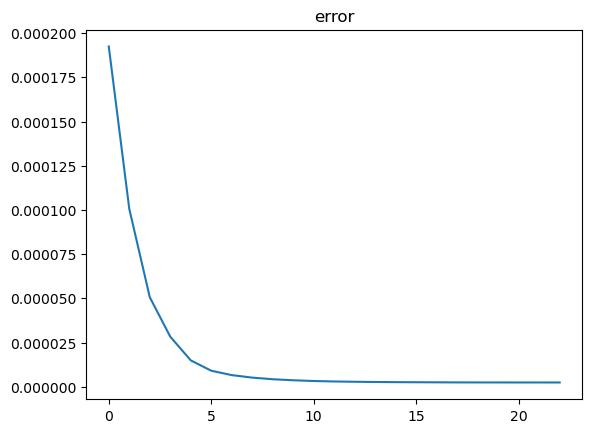

In [25]:
plt.plot(error)
plt.title("error")
plt.show()

### 2. Misalignment convergence

#### a) angle

In [94]:
def perturb_angle(v1, angle):
    '''
    Assuming centroid of v1 is at the origin, so no need to subtract centroid.
    rotating v1 around z axis
    '''
    R = np.array([[np.cos(angle), -np.sin(angle), 0.],
                  [np.sin(angle),  np.cos(angle), 0.],
                  [           0.,             0., 1.]])
    v1_rot = (R@v1.T).T
    return v1_rot

5.0
10.0
15.0
20.0
25.0
30.0
35.0
40.0
45.0
50.0
55.00000000000001
60.0
64.99999999999999
70.0
75.0
80.0
85.0
89.99999999999999
95.0
99.99999999999999
104.99999999999999
109.99999999999999
114.99999999999999
120.0
125.0
129.99999999999997
135.0
140.0
144.99999999999997
150.0
155.0
160.0
165.0
170.0
174.99999999999997
180.0


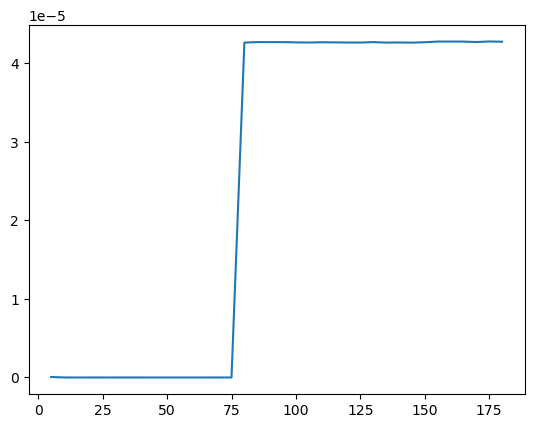

In [95]:
angles = np.linspace(5*np.pi/180, np.pi, 36) # 72 for 5 degree increment
convergence_error = []
for i in range(len(angles)):
    print(angles[i]/np.pi*180)
    v1_rot = perturb_angle(v1, angles[i]) 
    _, errors = icp(v1_rot, v1, curv1, curv1) #same curvature
    convergence_error.append(errors[-1])

plt.plot(angles/np.pi*180, convergence_error)
plt.show()

    

#### b) noise

In [27]:
def perturb_noise(v1, sigma):
    '''
    additive gaussian noise for each vertex
    sigma: sigma for [x, y, z]
    '''
    noise = np.random.normal(0, sigma, v1.shape)
    return v1+noise

0.001
0.003
0.005
0.007
0.009
0.01
0.03
0.05
0.07
0.09
0.1


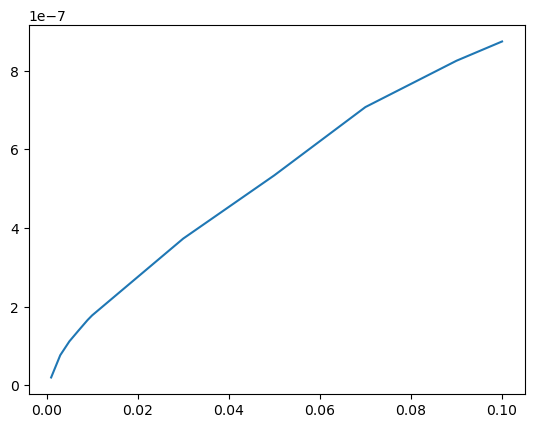

In [29]:
noise_ratio = [1e-3, 3e-3, 5e-3, 7e-3, 9e-3, 1e-2, 3e-2, 5e-2, 7e-2, 9e-2, 1e-1]
bbv1 = np.max(v1, axis=0) - np.min(v1, axis=0)
sigmas = (bbv1.reshape((3,1)) * noise_ratio).T

convergence_error = []
for i in range(len(noise_ratio)):
    print(noise_ratio[i])
    v1_noise = perturb_noise(v1, sigmas[i]) 
    curv1_noise = curvature(v1_noise)
    _, errors = icp(v1_noise, v1, curv1_noise, curv1)
    convergence_error.append(errors[-1])

plt.plot(noise_ratio, convergence_error)
plt.show()

### Sampling:

In [30]:
def uniform_sample(v1, ratio):
    '''
    Sample the points in v1 uniformly and output given ratio
    v1: nx3
    '''
    n_points = v1.shape[0]
    out_n = int(n_points * ratio)
    idx = np.arange(n_points)
    out_idx = np.random.choice(idx, out_n, replace=False)
    return out_idx

ratio:  0.01
ratio:  0.016681005372000592
ratio:  0.027825594022071243
ratio:  0.046415888336127774
ratio:  0.0774263682681127
ratio:  0.1291549665014884
ratio:  0.21544346900318834
ratio:  0.3593813663804626
ratio:  0.5994842503189409
ratio:  1.0


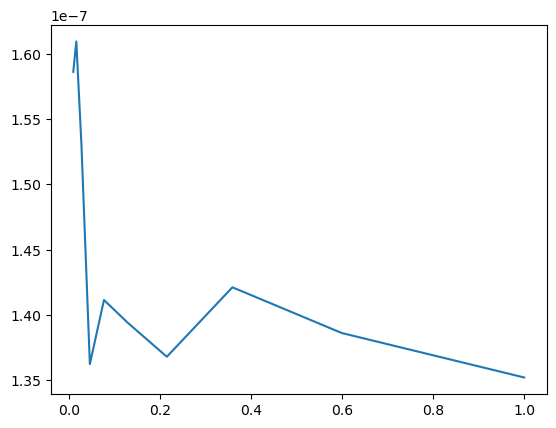

In [36]:
sample_ratios = np.linspace(-2, 0, 10)
sample_ratios = 10**sample_ratios
convergence_error = []
for i in range(len(sample_ratios)):
    print("ratio: ", sample_ratios[i])
    errors = []
    for j in range(int(0.5//sample_ratios[i])+1):
        # less samples have less stability
        # internal error calculation only works with 100% sampling
        new_v2, _ = icp(v2, v1, curv2, curv1, sample=sample_ratios[i])
        
        dist, index = find_closest_match(v1, new_v2)
        idx = dist <= 2*np.median(dist)
        p, q = v1[idx,:], new_v2[index[:,0],:][idx,:]
        errors.append(np.mean((p-q)**2))
        
    error = np.mean(errors)
    convergence_error.append(error)

plt.plot(sample_ratios, convergence_error)
plt.show()


### Global

In [74]:
v3, f3 = igl.read_triangle_mesh("bunny_v2/bun090_v2.ply")
v4, f4 = igl.read_triangle_mesh("bunny_v2/bun180_v2.ply")
v5, f5 = igl.read_triangle_mesh("bunny_v2/bun270_v2.ply")
v6, f6 = igl.read_triangle_mesh("bunny_v2/bun315_v2.ply")
curv3 = curvature(v3)
curv4 = curvature(v4)
curv5 = curvature(v5)
curv6 = curvature(v6)

In [91]:
v3, f3 = igl.read_triangle_mesh("bunny_v2/bun090_v2.ply")
v4, f4 = igl.read_triangle_mesh("bunny_v2/bun180_v2.ply")
v5, f5 = igl.read_triangle_mesh("bunny_v2/bun270_v2.ply")
v6, f6 = igl.read_triangle_mesh("bunny_v2/bun315_v2.ply")
# manually align
def change_orientation(v1, x, y, z):
    '''
    Manually align meshes
    '''
    x = x/180*np.pi
    y = y/180*np.pi
    z = z/180*np.pi
    
    Rx = np.array([[1, 0, 0],
                  [0, np.cos(x), -np.sin(x)],
                  [0, np.sin(x), np.cos(x)]])
    
    Ry = np.array([[np.cos(y), 0, np.sin(y)],
                  [0, 1, 0],
                  [-np.sin(y), 0, np.cos(y)]])
    
    Rz = np.array([[np.cos(z), -np.sin(z), 0.],
                  [np.sin(z),  np.cos(z), 0.],
                  [           0.,             0., 1.]])
    v1_rot = (Rz@Ry@Rx@v1.T).T
    return v1_rot

v3 = change_orientation(v3, 5,90,0)
igl.write_triangle_mesh("./generated_meshes/new_bun_090.ply", v3, f3)
v4 = change_orientation(v4, 0, 180, -2)
igl.write_triangle_mesh("./generated_meshes/new_bun_180.ply", v4, f4)
v5 = change_orientation(v5, 0, -90, 0)
igl.write_triangle_mesh("./generated_meshes/new_bun_270.ply", v5, f5)
v6 = change_orientation(v6, 0, -45, 0)
igl.write_triangle_mesh("./generated_meshes/new_bun_315.ply", v6, f6)

True

In [93]:
# using brute force method 2 in ppt

vertex_list = [v5, v6, v1, v2]
curv_list = [curv5, curv6, curv1, curv2, curv4, curv3]
face_list = [f5, f6, f1, f2, f4, f3]
ratio = 0.5
# roughly align
for i in range(1, len(vertex_list)):
    # fit the mesh to the previous one
    print(i)
    current_vert = vertex_list[i-1]
    new_vertices, _ = icp(vertex_list[i], current_vert, curv_list[i], curv_list[i-1], sample=ratio, use_dist=True)
    vertex_list[i] = new_vertices

# write the meshs
for i in range(len(vertex_list)):
    vertices = vertex_list[i]
    igl.write_triangle_mesh("./generated_meshes/rough_bunny"+str(i+1)+".ply", vertices, face_list[i])


current_vert = np.vstack((vertex_list[0], vertex_list[1], vertex_list[2], vertex_list[3]))
vertex_list.append(v4)
vertex_list.append(v3)
length_list = [x.shape[0] for x in vertex_list]
extract_index = np.zeros(len(length_list)+1)
extract_index[1:] = np.cumsum(length_list)
# global alignment
for i in range(4, len(vertex_list)):
    # treat the previous scans as one single mesh
    # fit the big mesh to the new one
    print(i)
    curv_curr = curvature(current_vert)
    # transform to sampled vert, get the big mesh vertices(can be extracted after)
    new_vertices, _ = icp(current_vert, vertex_list[i], curv_curr, curv_list[i], sample=0.9, use_dist=True)
    # add new mesh to big mesh
    current_vert = np.vstack((new_vertices, vertex_list[i]))

# write the meshs
for i in range(len(vertex_list)):
    start = int(extract_index[i])
    end = int(extract_index[i+1])
    vertices = current_vert[start:end, :]
    igl.write_triangle_mesh("./generated_meshes/bunny"+str(i)+".ply", vertices, face_list[i])


1
2
3
4
5


### point to plane

In [54]:
import open3d

# only to color the normals
ply1 = open3d.io.read_triangle_mesh("bunny_v2/bun000_v2.ply")
ply1 = ply1.compute_vertex_normals()
ns = np.asarray(ply1.vertex_normals)
ns = (ns + 1) / 2.
ply1.vertex_colors = open3d.utility.Vector3dVector(ns)
open3d.io.write_triangle_mesh("./generated_meshes/bun000_v2_normal.ply", ply1)

True

In [104]:
'''
TODO: icp reject with normal
TODO: icp colors show
TODO: clean up icp code
'''

(40097, 3)
